# Investment Value

In [19]:
# Initial imports
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [20]:
# Set current amount of shares data
# YOUR CODE HERE!
current_shares = { 
    "shares" : [200,300]
}


# Set the tickers
tickers = ["MSFT", "AAPL"]



# Create the shares DataFrame
# YOUR CODE HERE!

current_df = pd.DataFrame(current_shares, index=tickers)

# Display shares data
# YOUR CODE HERE!

current_df

,shares
MSFT,200
AAPL,300


In [21]:
# Load .env environment variables
# YOUR CODE HERE!

alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv("ALPACA_SECRET_KEY")

In [22]:
print(alpaca_secret)

XX5M3m1e3p9SCKyuXc0J9r2xNuVFupIYrw2xWT3C


In [23]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

"done above"

'done above'

In [66]:
# Verify that Alpaca key and secret were correctly loaded
# YOUR CODE HERE!

print(type(alpaca_key))
print(type(alpaca_secret)) 

<class 'str'>
<class 'str'>


In [60]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret,
    api_version = "v2")

In [67]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-01", tz="America/New_York").isoformat()

print(today)

2022-06-01T00:00:00-04:00


In [36]:
# Set timeframe to one day ("1Day") for the Alpaca API
# YOUR CODE HERE!

timeframe = "1Day"

In [86]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
AAPL = df_portfolio[df_portfolio['symbol']=='AAPL'].drop("symbol", axis=1)
MSFT = df_portfolio[df_portfolio['symbol']=='MSFT'].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio = pd.concat([AAPL, MSFT], axis=1, keys=["AAPL", "MSFT"])


# Display sample data
df_portfolio



AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-06-01 04:00:00+00:00  149.92  151.74  147.68  148.71  73871387   

                                                    MSFT                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2022-06-01 04:00:00+00:00      624424  149.374805  275.0  277.69  270.04   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-01 04:00:00+00:00  272.42  25108530      318649  273.328471

## Calculate the current value in dollars of the stock portfolio

In [89]:
# Fetch the current closing prices from the DataFrame
msft_price = float(df_portfolio["MSFT"]["close"])
aapl_price = float(df_portfolio["AAPL"]["close"])

In [96]:
# Compute the current value in dollars of the stock portfolio
msft_value = msft_price * current_df.loc["MSFT"]["shares"]
aapl_value = aapl_price * current_df.loc["AAPL"]["shares"]


# Print the current value of the stocks portfolio
msft_value
aapl_value

44613.0

## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [102]:
# Set the data for the shares value DataFrame
value_data = {
    "MSFT" : [msft_value],
    "AAPL" : [aapl_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,MSFT,AAPL
0,54484.0,44613.0


array([<AxesSubplot:ylabel='shares'>], dtype=object)

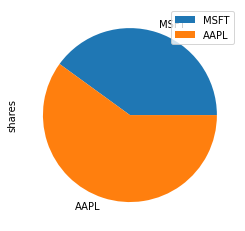

In [105]:
# Create a pie chart to show the proportion of stocks in the port
current_df.plot.pie(subplots=True)

<AxesSubplot:>

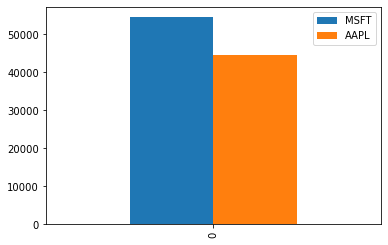

In [107]:
# Create a bar plot to show the value of shares
df_value.plot.bar()